<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-Predicting-if-the-Question-is-Answered" data-toc-modified-id="Introduction:-Predicting-if-the-Question-is-Answered-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: Predicting if the Question is Answered</a></span></li><li><span><a href="#Data-Frame-1" data-toc-modified-id="Data-Frame-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Frame 1</a></span><ul class="toc-item"><li><span><a href="#Reading-in-DataFrame" data-toc-modified-id="Reading-in-DataFrame-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading in DataFrame</a></span></li><li><span><a href="#Baseline-Bias" data-toc-modified-id="Baseline-Bias-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Baseline Bias</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Removing-Duplicate-Rows" data-toc-modified-id="Removing-Duplicate-Rows-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Removing Duplicate Rows</a></span></li><li><span><a href="#Transforming-Data-With-FunctionTransformer" data-toc-modified-id="Transforming-Data-With-FunctionTransformer-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Transforming Data With FunctionTransformer</a></span></li><li><span><a href="#Sampling-the-Data-In-Order-to-Create-Even-Classes" data-toc-modified-id="Sampling-the-Data-In-Order-to-Create-Even-Classes-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Sampling the Data In Order to Create Even Classes</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Instantiating-X-and-y-variables" data-toc-modified-id="Instantiating-X-and-y-variables-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Instantiating X and y variables</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Logistic-Regression-Gridsearch" data-toc-modified-id="Logistic-Regression-Gridsearch-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Logistic Regression Gridsearch</a></span></li><li><span><a href="#KNN-Gridsearch" data-toc-modified-id="KNN-Gridsearch-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>KNN Gridsearch</a></span></li><li><span><a href="#Random-Forest-Gridsearch" data-toc-modified-id="Random-Forest-Gridsearch-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Random Forest Gridsearch</a></span></li></ul></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#Function-Definition" data-toc-modified-id="Function-Definition-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Function Definition</a></span></li><li><span><a href="#Function-Execution:-Confusion-Matrix-Results" data-toc-modified-id="Function-Execution:-Confusion-Matrix-Results-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Function Execution: Confusion Matrix Results</a></span></li></ul></li></ul></li><li><span><a href="#Data-Frame-2" data-toc-modified-id="Data-Frame-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Frame 2</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Gridsearch" data-toc-modified-id="Logistic-Regression-Gridsearch-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression Gridsearch</a></span><ul class="toc-item"><li><span><a href="#Words-Most-Indicative-of-a-Question-Being-Answered." data-toc-modified-id="Words-Most-Indicative-of-a-Question-Being-Answered.-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Words Most Indicative of a Question Being Answered.</a></span></li><li><span><a href="#Words-most-indicative-to-the-question-NOT-being-answered:" data-toc-modified-id="Words-most-indicative-to-the-question-NOT-being-answered:-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Words most indicative to the question NOT being answered:</a></span></li></ul></li><li><span><a href="#Thank-You!!" data-toc-modified-id="Thank-You!!-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Thank You!!</a></span></li></ul></li></ul></div>

# Sampled Modeling

## Introduction: Predicting if the Question is Answered

To better understand the impact of how a question is asked, I built a model to see how well I could predict if a question was answered based on the question text and the question score. In this notebook, I grid-search over two dataframes with several models.

*Dataframe 1:*
In the unsampled model from the notebook "4a_Unsampled_Modeling.ipynb", I performed a grid-search over the whole data frame using `questions_body` and `questions_score` as features. Since the classes were highly unbalanced (answerd vs. un-answered), with a 98% baseline score, I decided to sample the data to even out the classes. Additionally, I removed duplicate data by removing answer and tag data and replacing them with a "was_answered" and "has_tag" boolean column. Both the `questions_body` and `questions_score` were kept as features. 

*Dataframe 2:*
In the second dataframe, I used the same sampled dataframe as in "dataframe 1" but dropped the `questions_score` feature, since I hypothesized that `question_score` was a strong indicator of a question being answered. Additionally, it is easier to get real-time feedback on the text of your question, versus waiting for others to up-vote it, in order to increase your chances of the question being answered.

For the first dataframe, I grid-searched over Logistic Regression, K-Nearest Neighbors, and Random Forest, with Random Forest Providing the best results. 

In the second dataframe I only used Logistic Regression due to time.

In [1]:
    #General
import pandas as pd
import numpy as np

    #Exporting python objects for later recall
# using dill to export the GridSearchCV object
# dill is an augmented version of pickle github.com/uqfoundation/dill
# Since the GridSearchCV object contains a lambda function, regular pickle cannot dump or load it
# also note that we are not using joblib here since we are not saving off large (>4GB) numpy arrays
import dill as pickle


    #Plotting
import matplotlib.pyplot as plt
import seaborn as sns


    #Sklearn Packages
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction import stop_words, text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

    #Suppress FutureWarning messages\n",
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%config InlineBackend.figure_format = 'retina'

## Data Frame 1

### Reading in DataFrame

In [2]:
df = pd.read_csv('./Datasets/cleaned_4_modeling.csv')

In [3]:
df.isnull().sum()

questions_id              0
questions_author_id       0
questions_date_added      0
questions_title           0
questions_body            0
questions_score           8
was_answered              0
answers_score           837
dtype: int64

For the sake of this classification model, we're not going to use the answers_score column and so I will drop it. 

In [4]:
df.drop(columns='answers_score', inplace=True)

In [5]:
df.shape

(51944, 7)

Since there are only 8 rows with nulls out of about 52k, dropping the rows where there are nulls in the questions_score will not significantly affect the predictions.

In [6]:
df.dropna(axis = 0, inplace=True)

### Baseline Bias

Since most of the questions are answered the classes are highly unbalanced with 98% Baseline Accuracy Score

In [7]:
print("baseline:", df['was_answered'].mean())
df['was_answered'].value_counts()

baseline: 0.9841920825631546


1.0    51115
0.0      821
Name: was_answered, dtype: int64

### Preprocessing

#### Removing Duplicate Rows

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(23928, 7)

#### Transforming Data With FunctionTransformer

In order to format the data for modeling I'm using a Function Transformer

In [9]:
get_text_data = FunctionTransformer(lambda x: x['questions_body'], validate = False)
get_numeric_data = FunctionTransformer(lambda x: x[['questions_score',]], validate = False)

#### Sampling the Data In Order to Create Even Classes

Since the classes above are so unbalanced I'm only taking a sample of the data where the question was answered. This creates a new baseline accuracy near 50% so we can actually model and test how much impact our features have on being able to predict if the question is answered or not. If we did not balance the classes, the model could just predict a question as answered every time and it would be 98% correct.

Creating portioned dataframes that have even classes of the dataframe where questions were and were not answered:

In [10]:
df_was = df[df['was_answered']==1].sample(n=900)
df_wasnt = df[df['was_answered']==0]

Concatenating the portioned dataframes above back into one dataframe to be used in modeling.

In [11]:
sample_df = pd.concat([df_was, df_wasnt])

Getting the new baseline accuracy score so we can compare how the models performed.

In [12]:
sample_df['was_answered'].mean()

0.5229517722254503

### Modeling

#### Instantiating X and y variables

In [13]:
y = sample_df['was_answered']
X = sample_df[['questions_body','questions_score']]

#### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42)

Pickle the data to access later if it is desired to re-run the models using the same train and test datasets.

In [15]:
X_train.to_pickle("./pickles/X_train_4b.pkl")
X_test.to_pickle("./pickles/X_test_4b.pkl")
y_train.to_pickle("./pickles/y_train_4b.pkl")
y_test.to_pickle("./pickles/y_test_4b.pkl")

In [16]:
X_train_loaded = pd.read_pickle("./pickles/X_train_4b.pkl")
X_test_loaded = pd.read_pickle("./pickles/X_test_4b.pkl")
y_train_loaded = pd.read_pickle("./pickles/y_train_4b.pkl")
y_test_loaded = pd.read_pickle("./pickles/y_test_4b.pkl")

#### Logistic Regression Gridsearch

Building a Pipeline to Grid Search Using Standard Scaler, Count Vectorizer

In [17]:
pipe_logreg = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('cvec', CountVectorizer())
            ]))
    ])),
    ('logreg', LogisticRegression(solver='liblinear'))
])

params_logreg = {
           'logreg__penalty' : ['l1', 'l2']
}

gs_logreg = GridSearchCV(pipe_logreg, params_logreg, cv=5)
gs_logreg.fit(X_train, y_train)

with open("./pickles/gs_logreg_4b.pkl", 'wb') as f:
    pickle.dump(gs_logreg, f)


In [18]:
# re-load grid-search object so do not have to re-run the model if accessing notebook later
with open("./pickles/gs_logreg_4b.pkl", 'rb') as f:
    gs_logreg_loaded = pickle.load(f)

print("train score", gs_logreg_loaded.score(X_train_loaded, y_train_loaded))
print("test score", gs_logreg_loaded.score(X_test_loaded, y_test_loaded))
print("best params:", gs_logreg_loaded.best_params_)

train score 0.9170542635658915
test score 0.765661252900232
best params: {'logreg__penalty': 'l1'}


#### KNN Gridsearch

In [19]:
pipe_knn = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('cvec', CountVectorizer())
            ]))
    ])),
    ('knn', KNeighborsClassifier())

])

params_knn = {
    'knn__n_neighbors' : [3, 5, 10, 15, 20],
#     'knn__metric': ['euclidean', 'manhattan']  #Takes a while to run

}

gs_knn = GridSearchCV(pipe_knn, params_knn, cv=5)
gs_knn.fit(X_train, y_train)

with open("./pickles/gs_knn_4b.pkl", 'wb') as f:
    pickle.dump(gs_knn, f)

In [20]:
# re-load grid-search object so do not have to re-run the model if accessing notebook later
with open("./pickles/gs_knn_4b.pkl", 'rb') as f:
    gs_knn_loaded = pickle.load(f)

print("train score", gs_knn_loaded.score(X_train_loaded, y_train_loaded))
print("test score", gs_knn_loaded.score(X_test_loaded, y_test_loaded))
print("best params:", gs_knn_loaded.best_params_)

train score 0.8054263565891473
test score 0.654292343387471
best params: {'knn__n_neighbors': 3}


#### Random Forest Gridsearch

In [21]:
pipe_rf = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('cvec', CountVectorizer())
            ]))
    ])),
    ('rf', RandomForestClassifier(random_state=42))

])

params_rf = {
    'rf__n_estimators': [100,125],
    'rf__max_depth': [None, 4, 5, 6],
    'rf__max_features': [None,"auto"]}
    

gs_rf = GridSearchCV(pipe_rf, params_rf, cv=5)
gs_rf.fit(X_train, y_train)

with open("./pickles/gs_rf_4b.pkl", 'wb') as f:
    pickle.dump(gs_rf, f)

In [22]:
# re-load grid-search object so do not have to re-run the model if accessing notebook later
with open("./pickles/gs_rf_4b.pkl", 'rb') as f:
    gs_rf_loaded = pickle.load(f)

print("train score", gs_rf_loaded.score(X_train_loaded, y_train_loaded))
print("test score", gs_rf_loaded.score(X_test_loaded, y_test_loaded))
print("best params:", gs_rf_loaded.best_params_)

train score 0.8612403100775193
test score 0.8097447795823666
best params: {'rf__max_depth': 5, 'rf__max_features': None, 'rf__n_estimators': 100}


### Confusion Matrix

#### Function Definition

Defining a Function that Returns a Confusion Matrix as a DataFrame

A confusion matrix provides evaluation metrics that highlight how the model is being accurate and erroneous. The confusion matrix below shows scores from the Random Forest Model which had the best prediction results.

In [6]:
def make_confusion(y_test, preds, classes):

    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    print(f'Precision Score: {precision_score(y_test, preds)}')
    print(f'Recall Score: {recall_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])

#### Function Execution: Confusion Matrix Results

Calling `make_confusion` function to get Accuracy, Precision and Recalls Scores and Confusion Matrix

In [24]:
# build a function to print out a nice confusion matrix
preds = gs_rf_loaded.best_estimator_.predict(X_test)

make_confusion(y_test, preds, ["wasn't answered", "was answered"])

Accuracy Score: 0.8097447795823666
Precision Score: 0.7769516728624535
Recall Score: 0.9047619047619048


,Predicted wasn't answered,Predicted was answered
Actual wasn't answered,140,60
Actual was answered,22,209


## Data Frame 2

After successfully modeling if a question will be answered or not based on question body and score, I wanted to know how we could predict just on question body since score was a likely tell. Below, I modeled using a pipeline and grid-searching with logistic regression. This data set still uses the sampled data and balanced classes.

Setting up the X and Y variable, with only `questions_body` used as a predictor for y:

In [25]:
y = sample_df['was_answered']
X = sample_df['questions_body']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                   y,
                                                   random_state=42)

Pickle the data to access later if it is desired to re-run the models using the same train and test datasets.

In [26]:
X_train2.to_pickle("./pickles/X_train2_4b.pkl")
X_test2.to_pickle("./pickles/X_test2_4b.pkl")
y_train2.to_pickle("./pickles/y_train2_4b.pkl")
y_test2.to_pickle("./pickles/y_test2_4b.pkl")

In [4]:
X_train2_loaded = pd.read_pickle("./pickles/X_train2_4b.pkl")
X_test2_loaded = pd.read_pickle("./pickles/X_test2_4b.pkl")
y_train2_loaded = pd.read_pickle("./pickles/y_train2_4b.pkl")
y_test2_loaded = pd.read_pickle("./pickles/y_test2_4b.pkl")

### Logistic Regression Gridsearch

In [28]:
pipe_logreg2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

params_logreg2 = {
    'cvec__stop_words' : [None, 'english'],
    'logreg__penalty' : ['none','l2'],
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__ngram_range': [(1,1), (1,2)]
}


gs_logreg2 = GridSearchCV(pipe_logreg2, # what object are we optimizing?
                  params_logreg2, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
gs_logreg2.fit(X_train2, y_train2)

with open("./pickles/gs_logreg2_4b.pkl", 'wb') as f:
    pickle.dump(gs_logreg2, f)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty,

In [7]:
# re-load grid-search object so do not have to re-run the model if accessing notebook later
with open("./pickles/gs_logreg2_4b.pkl", 'rb') as f:
    gs_logreg2_loaded = pickle.load(f)

gs_logreg2_model = gs_logreg2_loaded.best_estimator_
print("train score:", gs_logreg2_model.score(X_train2_loaded, y_train2_loaded))
print("test score:", gs_logreg2_model.score(X_test2_loaded, y_test2_loaded))

preds = gs_logreg2_loaded.best_estimator_.predict(X_test2_loaded)
make_confusion(y_test2_loaded, preds, ["wasn't answered", "was answered"])

train score: 0.9534883720930233
test score: 0.7308584686774942
Accuracy Score: 0.7308584686774942
Precision Score: 0.7555555555555555
Recall Score: 0.7359307359307359


,Predicted wasn't answered,Predicted was answered
Actual wasn't answered,145,55
Actual was answered,61,170


#### Words Most Indicative of a Question Being Answered.
Below I set up and output a dataframe with the coefficients (words most indicative to questions being answered or not answered)

In [8]:
coefs = gs_logreg2_loaded.best_estimator_.named_steps['logreg'].coef_[0]
features = gs_logreg2_loaded.best_estimator_.named_steps['cvec'].get_feature_names_out()
coef_df = pd.DataFrame({'features' : features,
             'coefficients': coefs})
coef_df.sort_values('coefficients', ascending = False);


Words most indicative to the question being answered:

In [12]:
coef_df.sort_values('coefficients', ascending = False).head(10)

,features,coefficients
914,development,1.442892
1563,love,1.241910
2633,teaching,1.178190
28,accounting,1.132492
1631,military,1.123589
238,art,1.081071
1865,police,1.001188
2411,software,0.994518
2833,use,0.962368
678,computer,0.957115


In [10]:
pd.DataFrame(coef_df.sort_values('coefficients', ascending = False)['features'].head(100).values.reshape((10,10)))

,0,1,2,3,4,5,6,7,8,9
0,development,love,teaching,accounting,military,art,police,software,use,computer
1,entrepreneurship,social,hard,video,general,save,care,graphic,grades,marketing
2,higher,ready,th,happen,doctor,wanted,open,hi,experiences,relations
3,stuck,mental,graduate,wont,mentoring,thinking,english,professor,jobs,trying
4,accountant,salary,career,careers,completed,teacher,indecisive,specialist,athletics,thing
5,money,plan,management,industry,hygeine,airline,want,project,tech,theatre
6,asking,dont,studying,marine,mechanical,basketball,terms,suggest,engineering,technology
7,company,insight,aircraft,human,filed,games,job,possibly,studyingtips,abroad
8,make,chemical,ips,doubt,require,buisness,level,college,puc,graduateschool
9,cosmetology,finance,cardiology,electricity,lawyer,ccnt,professional,youtuber,requires,counselor


In [16]:
coef_df['exp_coef'] = np.exp(coef_df['coefficients'])

In [25]:
coef_df.sort_values('exp_coef', ascending = False)

,features,coefficients,exp_coef
914,development,1.442892,4.232919
1563,love,1.241910,3.462219
2633,teaching,1.178190,3.248489
28,accounting,1.132492,3.103381
1631,military,1.123589,3.075873
...,...,...,...
401,biomedical,-0.965060,0.380960
1843,places,-0.989168,0.371886
2589,sure,-1.020490,0.360418
679,computers,-1.032476,0.356124


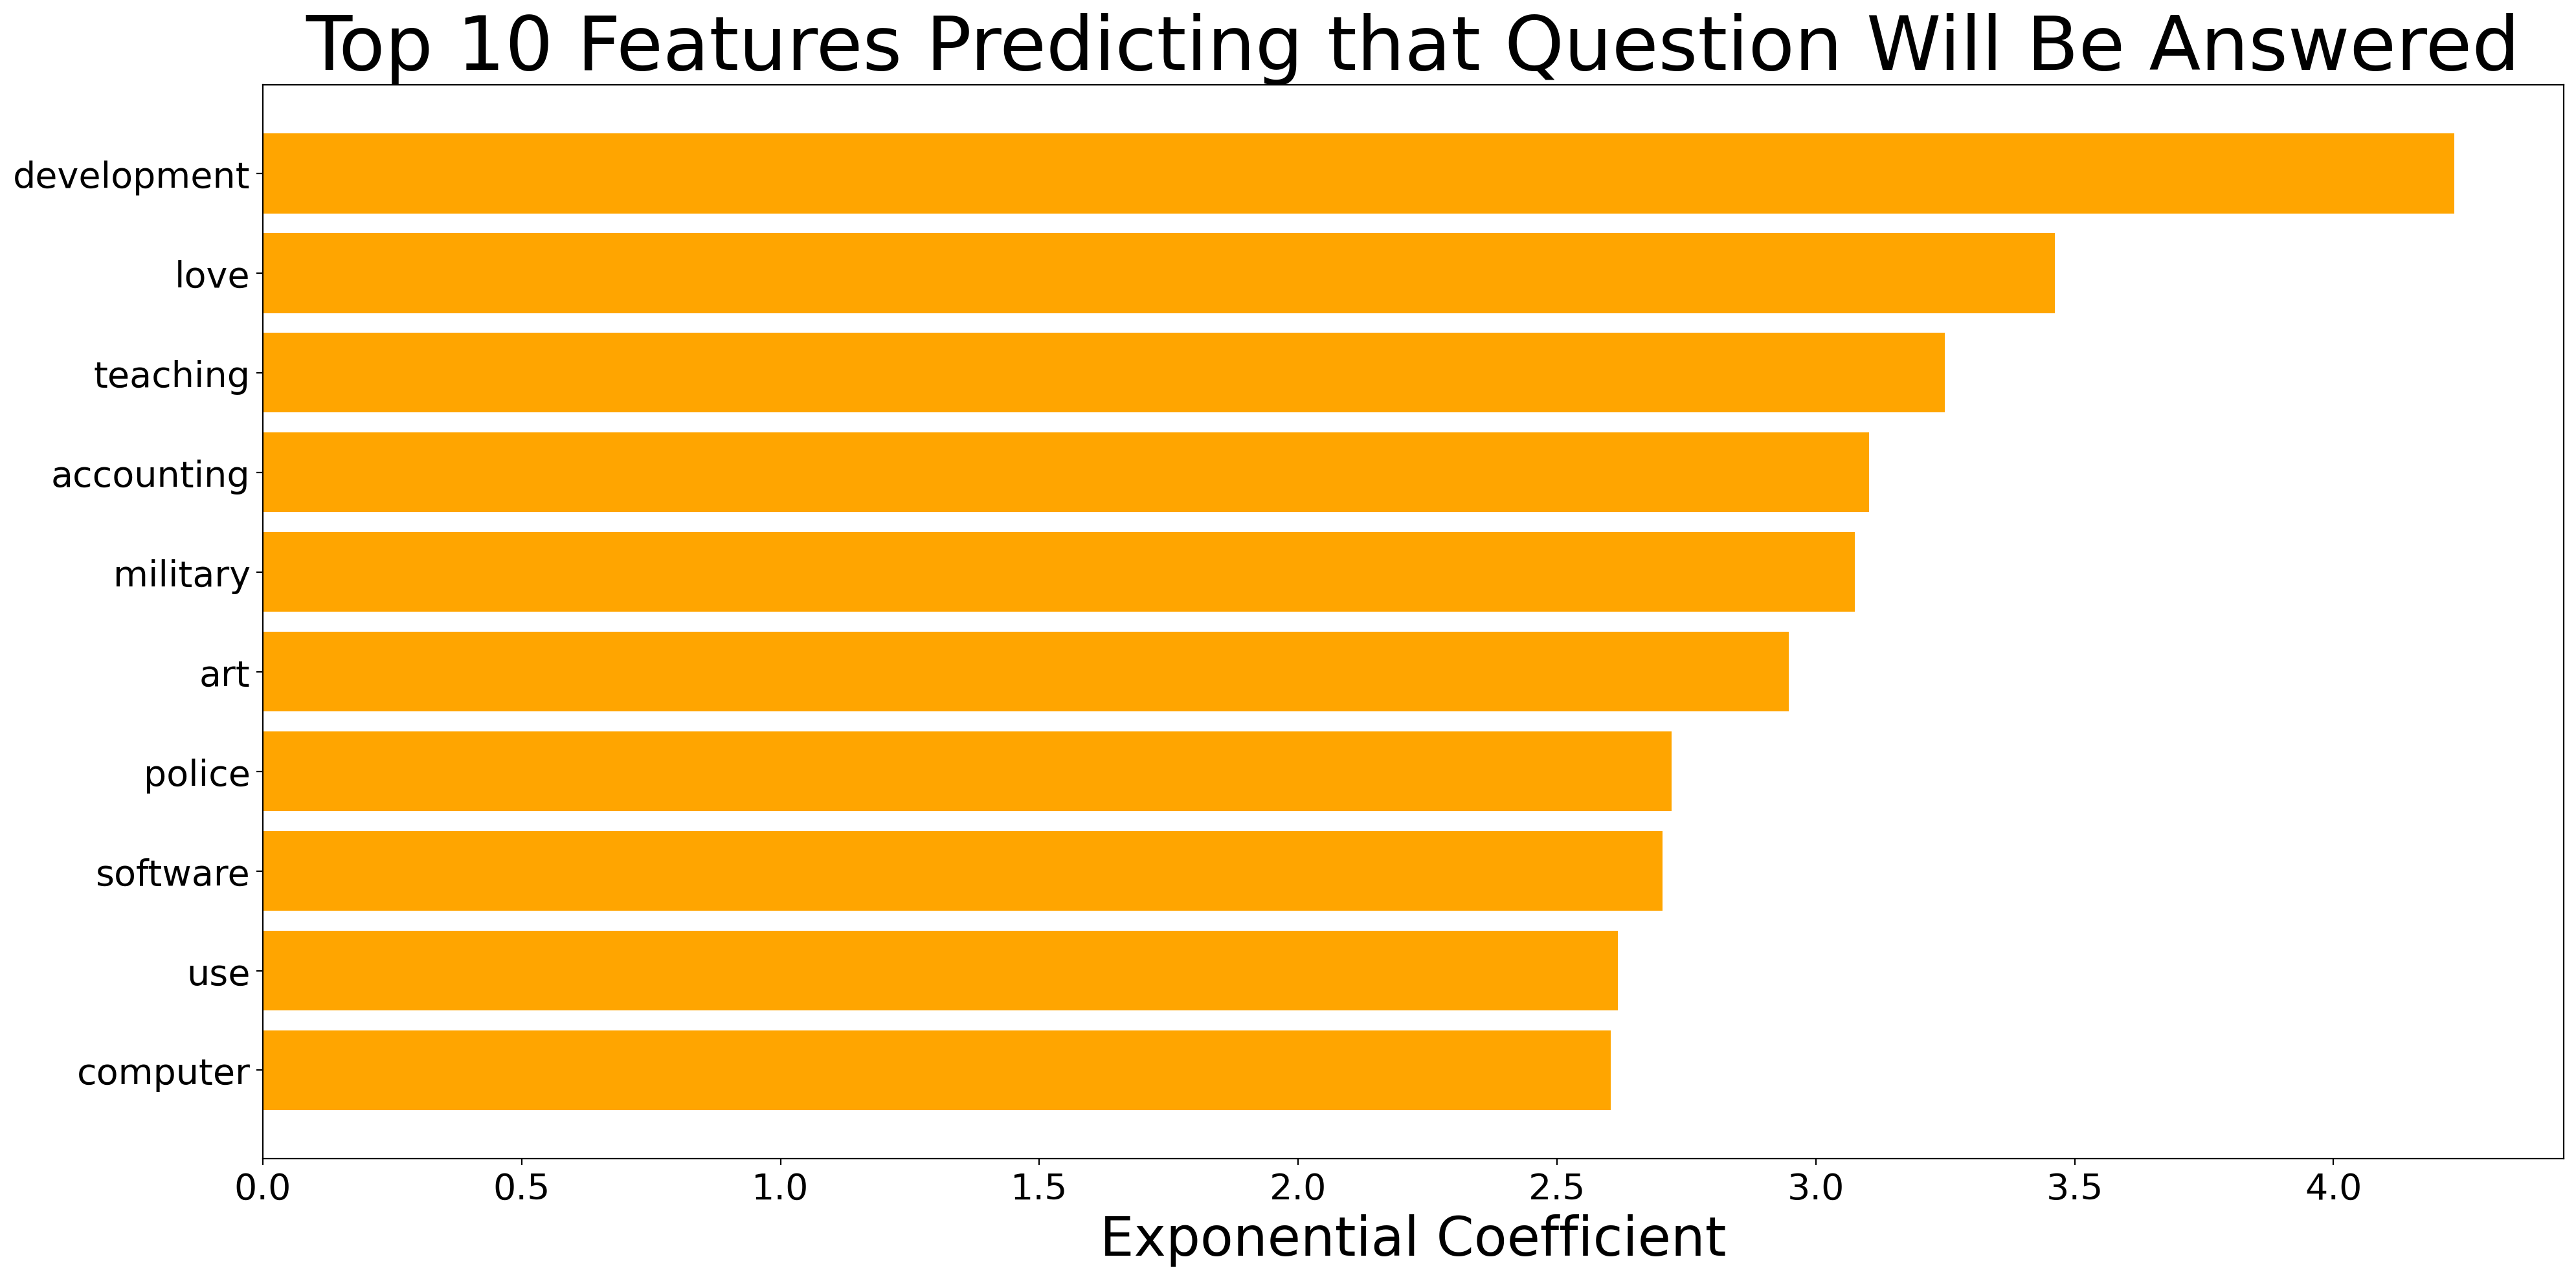

In [28]:
weights = coef_df['exp_coef'].sort_values(ascending = True).tail(10)
labels = coef_df.sort_values('exp_coef', ascending = True)['features'].tail(10).values

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = 'orange')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Exponential Coefficient', fontsize=30)
plt.title(f'Top 10 Features Predicting that Question Will Be Answered', fontsize=42)
plt.tight_layout()

#### Words most indicative to the question NOT being answered:

In [13]:
pd.DataFrame(coef_df.sort_values('coefficients', ascending = False)['features'].tail(100).values.reshape((10,10)))

,0,1,2,3,4,5,6,7,8,9
0,variety,undergrad,astronomy,economics,arizona,lower,looked,later,kids,alabama
1,analysis,gym,live,paying,california,corporate,collage,entering,basis,enter
2,female,courses,materials,broadcasting,nurseanesthetists,zoology,current,ib,say,diesel
3,jee,unless,order,kinds,aerospace,surgery,team,home,humanities,midwife
4,language,food,ultimately,taking,easy,balance,dental,mechanic,prep,veterinarian
5,route,tips,applications,special,orthodontist,choice,set,biology,criminaljustice,private
6,willing,forensics,likely,pediatric,speech,minor,surgeon,hospital,come,record
7,worth,exams,kinesiology,selection,boost,challenges,aid,advanced,environment,grader
8,animal,qualities,tutoring,pediatrics,choosing,anthropology,exam,confused,schooling,scholarships
9,uc,mcat,gap,looking,state,biomedical,places,sure,computers,federal


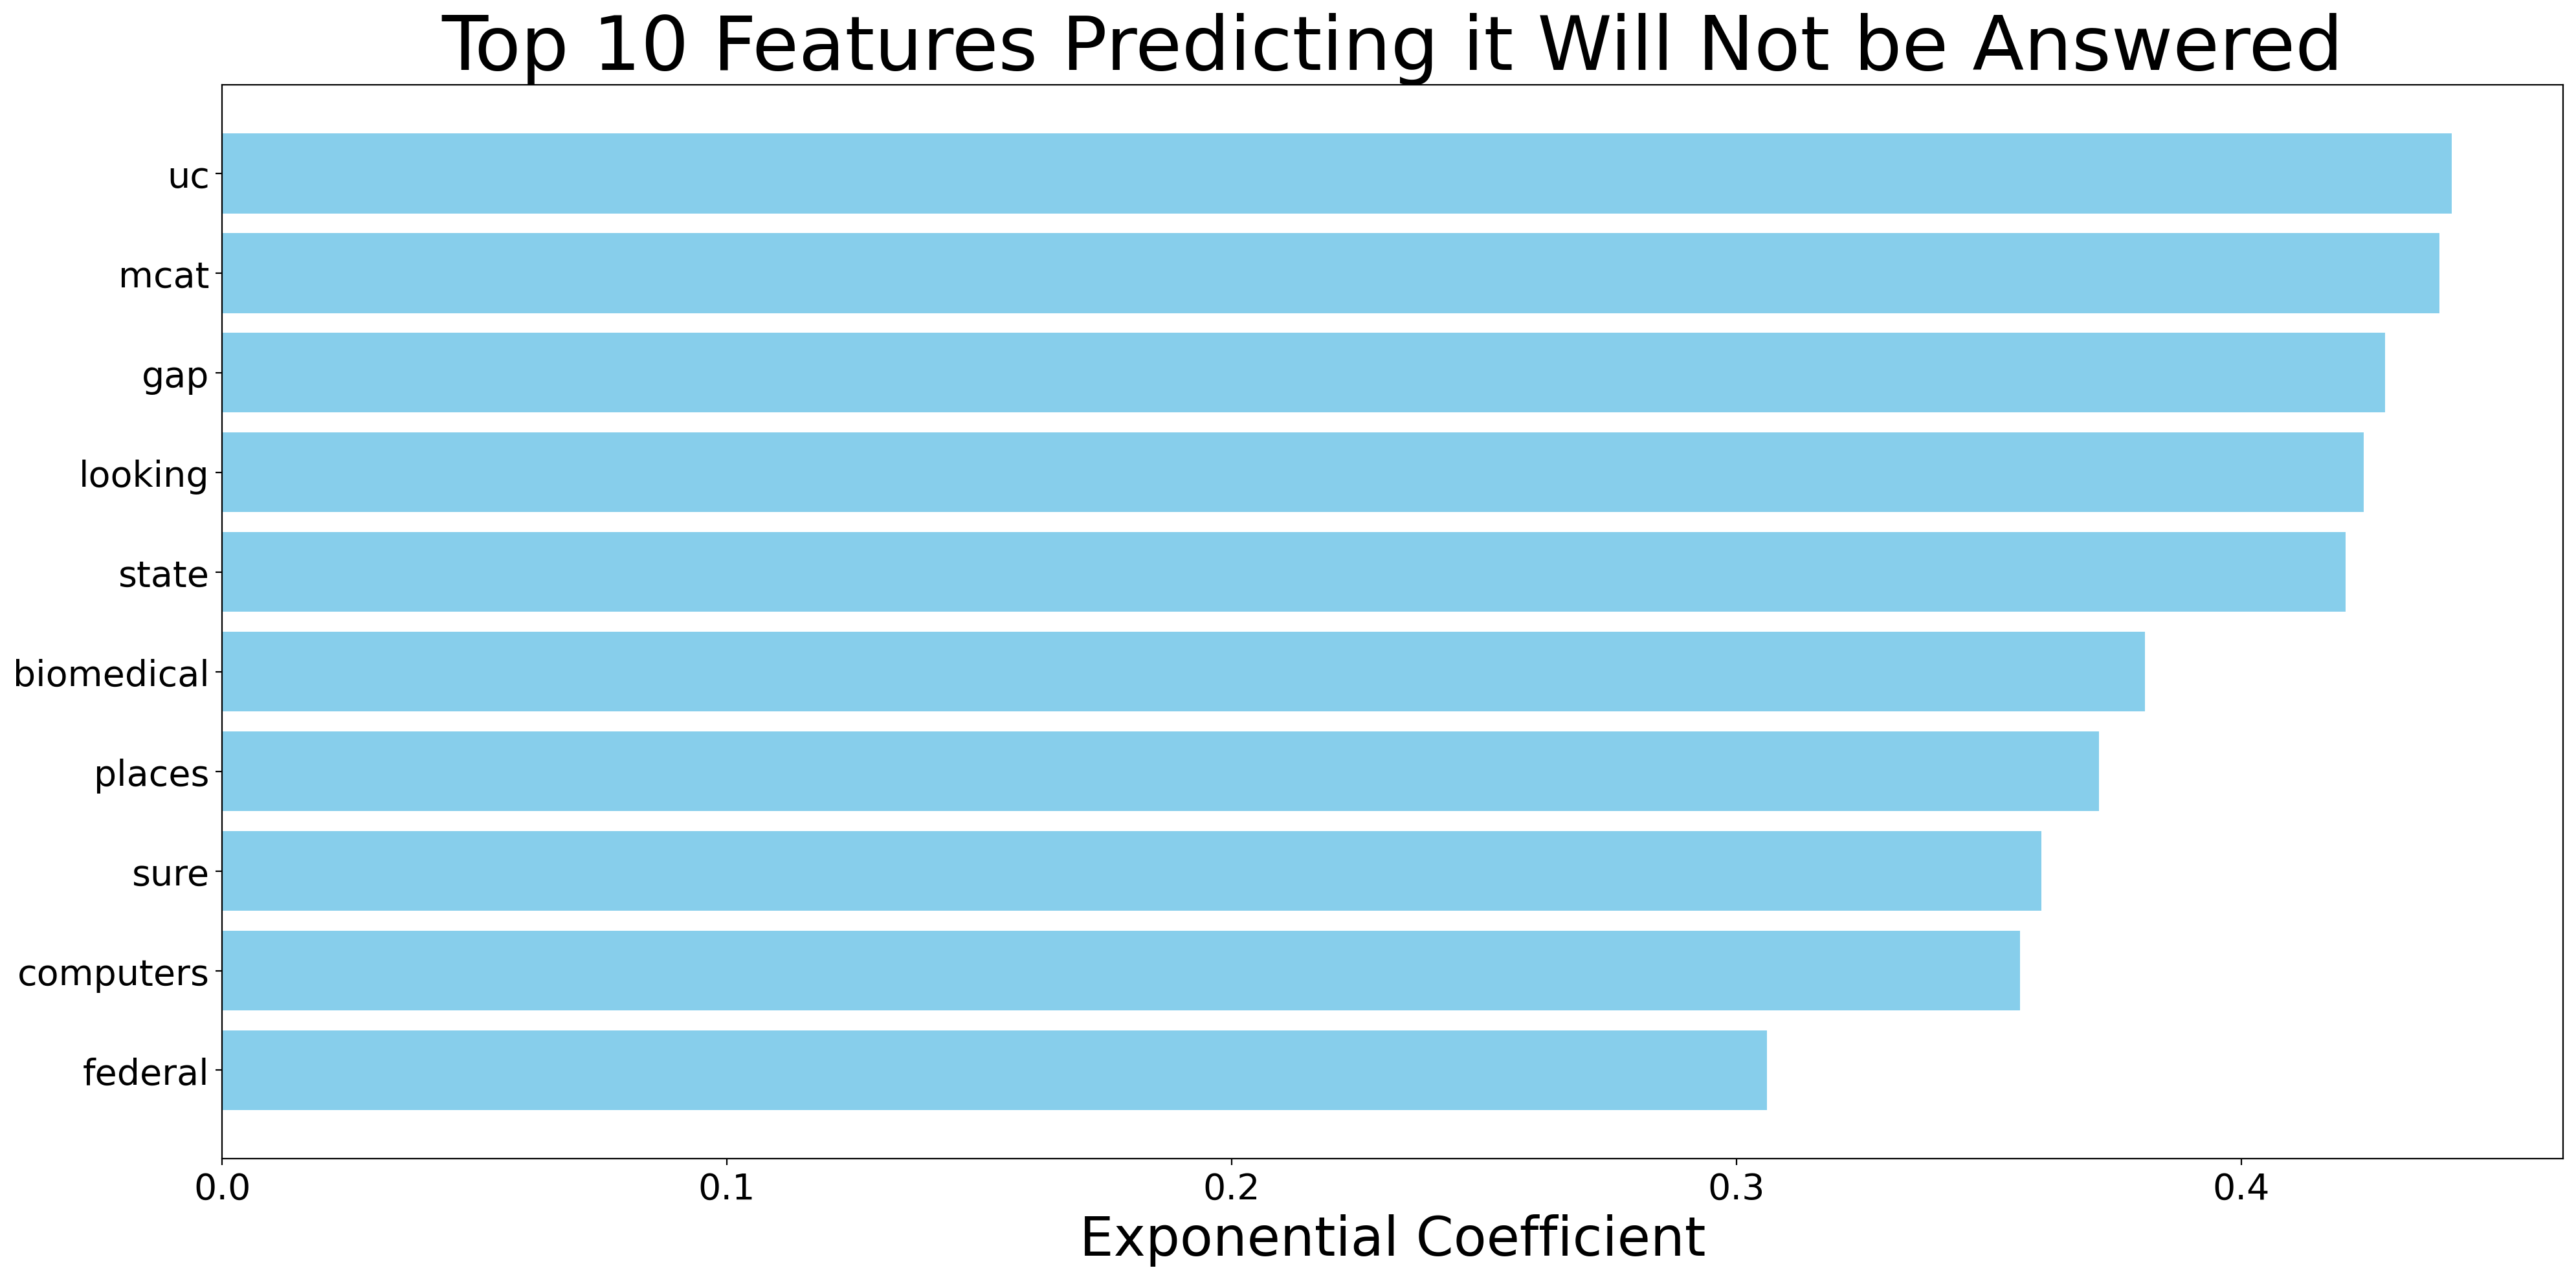

In [32]:
weights = coef_df['exp_coef'].sort_values(ascending = True).head(10)
labels = coef_df.sort_values('exp_coef', ascending = True)['features'].head(10).values

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = 'skyblue')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Exponential Coefficient', fontsize=30)
plt.title(f"Top 10 Features Predicting it Will Not be Answered", fontsize=42)
plt.tight_layout()

### Thank You!!